In [14]:
import sys
sys.path += ["../utils"]
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, rc={'text.usetex' : True})
sns.set_context({'axes.linewidth': 0.005})
sns.set_style('whitegrid')
sns.despine(left=True)
import results_utils 

In [37]:
blind_test = results_utils.generate_matrix('blind-test')
test = results_utils.generate_matrix('test')
dev = results_utils.generate_matrix('dev')

all_results = pd.concat([blind_test, test, dev], keys=['blind test', 'test', 'dev'])[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'], level=1)
all_results = all_results.stack().reset_index().rename(columns={'level_0': 'test type', 'level_1': 'embedding type', 'level_2': 'architecture', 0: 'F1'})
all_results[(all_results.architecture == 'svmrbf') & (all_results['test type'] == 'test')]

,test type,embedding type,architecture,F1
91,test,cbow-wikipedia,svmrbf,0.3276
95,test,cw-wikipedia,svmrbf,0.3134
99,test,glove-wikipedia,svmrbf,0.3144
103,test,glove-wikipedia-gigawords,svmrbf,0.3276
107,test,hpca-wikipedia,svmrbf,0.2201
111,test,random-vectors,svmrbf,0.2241
115,test,randomprojection-wikipedia,svmrbf,0.2201
122,test,reproduce-1,svmrbf,0.2282
123,test,reproduce-10,svmrbf,0.2282
127,test,reproduce-2,svmrbf,0.2282


## Reproducing paper results boxplot

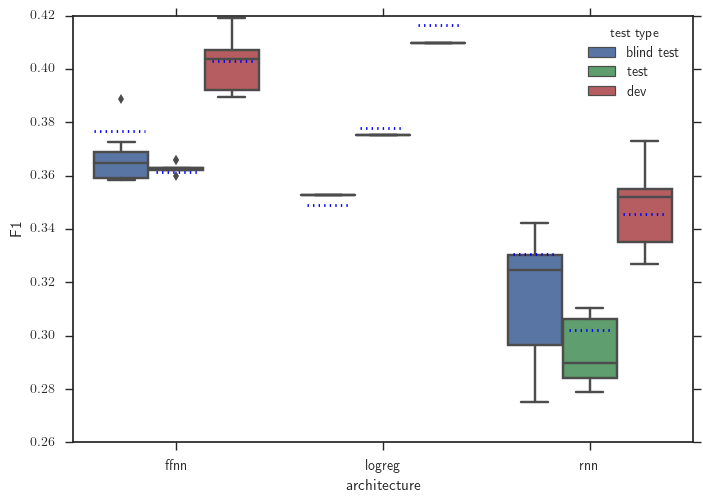

In [145]:
blind_test = results_utils.generate_matrix('blind-test')
test = results_utils.generate_matrix('test')
dev = results_utils.generate_matrix('dev')
all_results = pd.concat([blind_test, test, dev], keys=['blind test', 'test', 'dev'])[['ffnn', 'logreg', 'rnn']].drop(['average', 'variance'], level=1)
all_results = all_results.stack().reset_index().rename(columns={'level_0': 'test type', 'level_1': 'embedding type', 'level_2': 'architecture', 0: 'F1'})
reproduce_results = all_results[all_results['embedding type'].str.contains('reproduce')]
boxplot = sns.boxplot(data=reproduce_results, x='architecture', y='F1', hue='test type')
plt.plot([-0.4, -0.15],[0.3767, 0.3767], 'b:', lw=2)
plt.plot([-0.1, 0.1],  [0.3613, 0.3613], 'b:', lw=2)
plt.plot([0.17, 0.37], [0.4032, 0.4032], 'b:', lw=2)

plt.plot([0.63, 0.83], [0.3492, 0.3492], 'b:', lw=2)
plt.plot([0.89, 1.09], [0.3781, 0.3781], 'b:', lw=2)
plt.plot([1.17, 1.37], [0.4166, 0.4166], 'b:', lw=2)

plt.plot([1.63, 1.83], [0.3308, 0.3308], 'b:', lw=2)
plt.plot([1.90, 2.10], [0.3021, 0.3021], 'b:', lw=2)
plt.plot([2.16, 2.36], [0.3458, 0.3458], 'b:', lw=2)

boxplot.figure.savefig('../../master-paper/figures/reproduce_boxplot_architecture.pdf')

## Results of different embeddings, boxplot

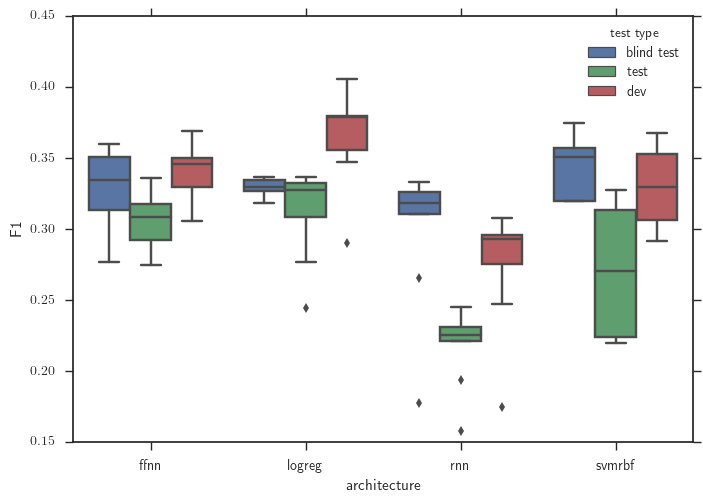

In [147]:
def filter_non_relevant(x):
    non_relevant = ['reproduce', 'skipgram', 'gigawords']
    for n in non_relevant:
        if n in x:
            return True
    return False
blind_test = results_utils.generate_matrix('blind-test')
blind_test = blind_test[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
blind_test = blind_test.ix[[x for x in blind_test.index if not filter_non_relevant(x)]]

test = results_utils.generate_matrix('test')
test = test[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
test = test.ix[[x for x in test.index if not filter_non_relevant(x)]]

dev = results_utils.generate_matrix('dev')
dev = dev[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
dev = dev.ix[[x for x in dev.index if not filter_non_relevant(x)]]

all_results = pd.concat([blind_test, test, dev], keys=['blind test', 'test', 'dev'])[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'], level=1)
all_results = all_results.stack().reset_index().rename(columns={'level_0': 'test type', 'level_1': 'embedding type', 'level_2': 'architecture', 0: 'F1'})

boxplot = sns.boxplot(data=all_results, x='architecture', y='F1', hue='test type')
boxplot.figure.savefig('../../master-paper/figures/boxplot_architectures.pdf')

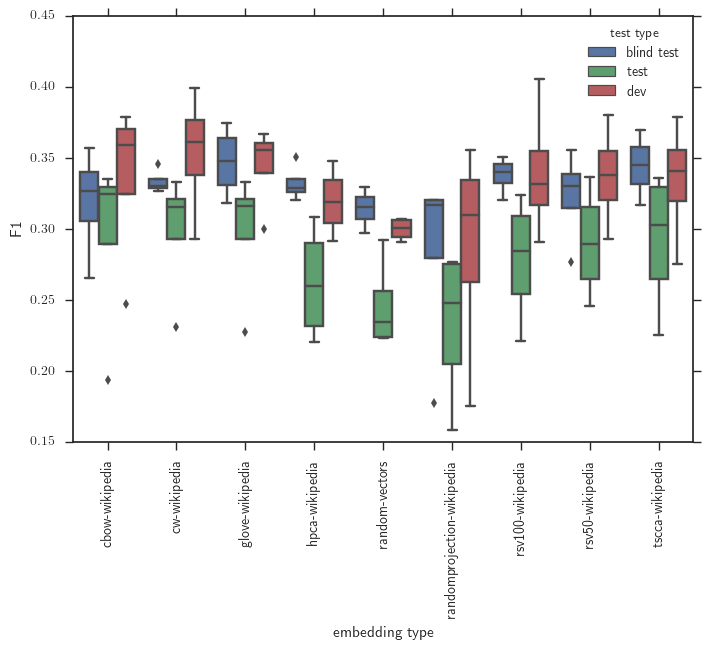

In [148]:
def filter_non_relevant(x):
    non_relevant = ['reproduce', 'skipgram', 'gigawords']
    for n in non_relevant:
        if n in x:
            return True
    return False
blind_test = results_utils.generate_matrix('blind-test')
blind_test = blind_test[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
blind_test = blind_test.ix[[x for x in blind_test.index if not filter_non_relevant(x)]]


test = results_utils.generate_matrix('test')
test = test[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
test = test.ix[[x for x in test.index if not filter_non_relevant(x)]]

dev = results_utils.generate_matrix('dev')
dev = dev[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
dev = dev.ix[[x for x in dev.index if not filter_non_relevant(x)]]

all_results = pd.concat([blind_test, test, dev], keys=['blind test', 'test', 'dev'])[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'], level=1)
all_results = all_results.stack().reset_index().rename(columns={'level_0': 'test type', 'level_1': 'embedding type', 'level_2': 'architecture', 0: 'F1'})

sns.boxplot(data=all_results, x='embedding type', y='F1', hue='test type')
plt.xticks(rotation='vertical')
boxplot.figure.savefig('../../master-paper/figures/boxplot_embeddings.pdf')

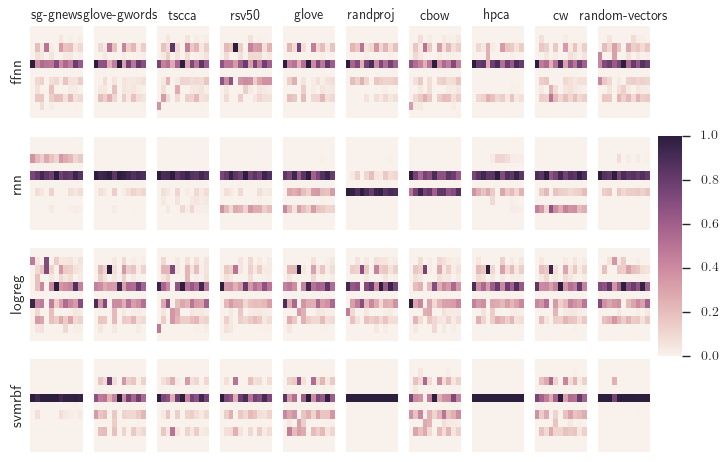

In [150]:
test_type = 'blind-test'
cm = results_utils.get_confusion_matrixes(test_type)
legit_embeddings = ['skipgram-googlenews', 'glove-wikipedia-gigawords', 'tscca-wikipedia', 'rsv50-wikipedia', 'glove-wikipedia', 'randomprojection-wikipedia', 'cbow-wikipedia', 'hpca-wikipedia', 'cw-wikipedia', 'random-vectors']
legit_archs = ['ffnn', 'rnn', 'logreg', 'svmrbf']
def get_next_cm():
    for arch in legit_archs:
        for emb in legit_embeddings:
            conf_matrix = cm[arch][emb]
            conf_matrix_norm = conf_matrix.divide(conf_matrix.sum(axis=0), axis=1)
            if emb.find('-wikipedia') != -1 and emb.find('-wikipedia-gigawords') == -1: 
                emb = emb[:emb.find('-wikipedia')]
            if emb == 'skipgram-googlenews':
                emb = 'sg-gnews'
            if emb == 'glove-wikipedia-gigawords':
                emb = 'glove-gwords'
            if emb == 'randomprojection':
                emb = 'randproj'
            yield arch, emb, conf_matrix_norm

fig, axn = plt.subplots(len(legit_archs), len(legit_embeddings), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
for (arch, emb, matrix), (i, ax) in zip(get_next_cm(), enumerate(axn.flat)):
    sns.heatmap(matrix, ax=ax,
                cbar=i == 0,
                cbar_ax=None if i else cbar_ax,
                xticklabels=False,
                yticklabels=False)
    if i < len(legit_embeddings):
        ax.set_title(emb, fontsize=10)
    if i % len(legit_embeddings) == 0:
        ax.set_ylabel(arch)

plt.savefig('../../master-paper/figures/archemb_confmatrix_{}.pdf'.format(test_type))

## Create result matrices

In [144]:
import results_utils
def cleanup_matrix(df):
    df = df.drop([x for x in df.index if 'reproduce' in x or 'rsv100' in x or 'skipgram-googlenews-' in x] + ['variance', 'average'])
    return df.drop(['svmlinear', 'variance', 'average'], axis=1)
def float_format(x):
    return "{:.2f}".format(x)
def find_max(arch):
    def find_max_in_df(x):
        y = '\\textbf{' + str(x) + '}' if x == clean.max()[arch] else str(x)
        return y
    return find_max_in_df
for testtype in ['dev', 'test', 'blind-test']:
    df = results_utils.generate_matrix(testtype)
    clean = cleanup_matrix(df)
    clean.to_latex('../../master-paper/tables/resultsmatrix_{}.table'.format(testtype), 
                   formatters={'ffnn': find_max('ffnn'), 
                               'rnn': find_max('rnn'), 
                               'svmrbf': find_max('svmrbf')}, 
                   escape=False,
                   float_format=float_format)

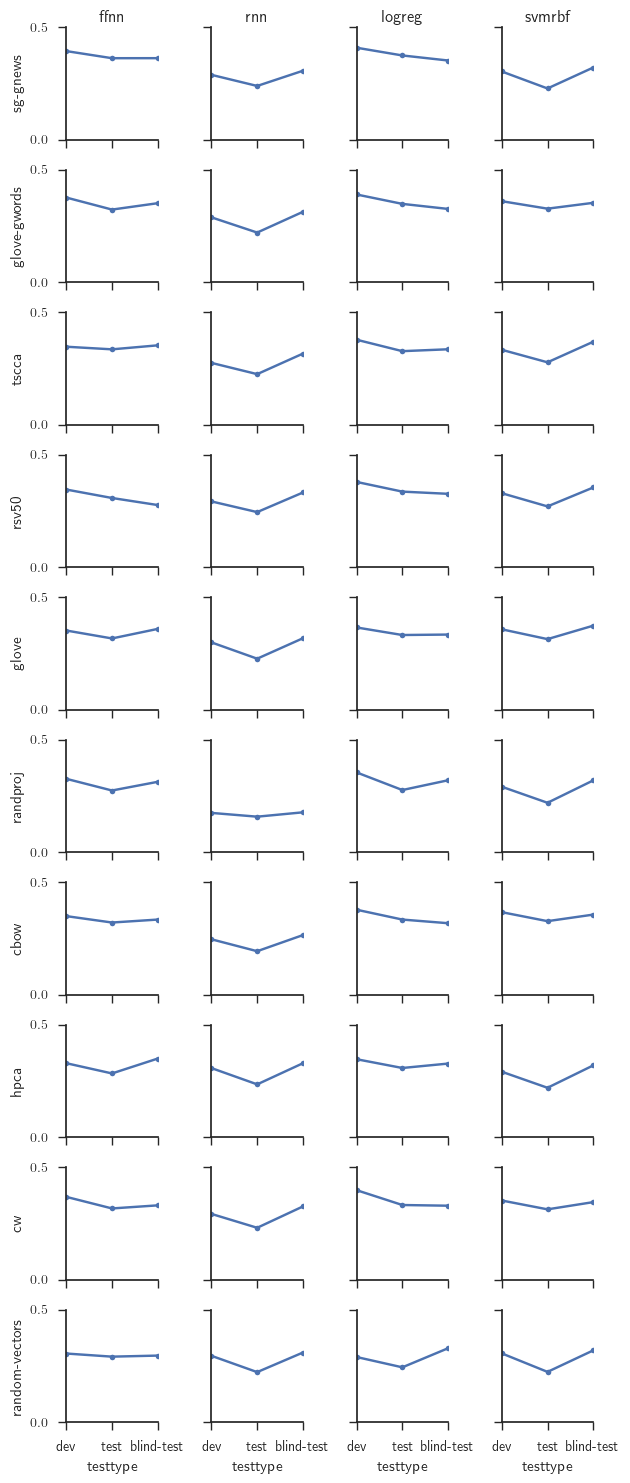

In [151]:
sns.set(style="ticks")

def cleanup_ylabel(s):
    if s.find('-wikipedia') != -1 and s.find('-wikipedia-gigawords') == -1: 
        s = s[:s.find('-wikipedia')]
    if s == 'skipgram-googlenews':
        s = 'sg-gnews'
    if s == 'glove-wikipedia-gigawords':
        s = 'glove-gwords'
    if s == 'randomprojection':
        s = 'randproj'
    return s


test_types = ['dev', 'test', 'blind-test']
matrices = {test_type: results_utils.generate_matrix(test_type) for test_type in test_types}

legit_embeddings = ['skipgram-googlenews', 'glove-wikipedia-gigawords', 'tscca-wikipedia', 'rsv50-wikipedia', 'glove-wikipedia', 'randomprojection-wikipedia', 'cbow-wikipedia', 'hpca-wikipedia', 'cw-wikipedia', 'random-vectors']
legit_archs = ['ffnn', 'rnn', 'logreg', 'svmrbf']

vals = []
test_type_indices = []
plot_indices = []
for i, test_type in enumerate(test_types):
    m = 0
    for j, emb in enumerate(legit_embeddings):
        for k, arch in enumerate(legit_archs):
            val = matrices[test_type][arch][emb]
            vals.append(val)
            test_type_indices.append(i)
            plot_indices.append("{} {}".format(emb, arch))
            m += 1
df=pd.DataFrame([vals, test_type_indices, plot_indices], index=['F1', 'testtype', 'plotindex']).T
df.sort_values(['plotindex', 'testtype'])


# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="plotindex", col_wrap=len(legit_archs), size=1.5)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "testtype", "F1", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(len(legit_archs)), yticks=[0, 0.5],
         xlim=(0, 2), ylim=(0, 0.5))

grid.set_titles(template="")
grid.set_xticklabels(labels=['dev', 'test', 'blind-test'])
for i, ax in enumerate(grid.axes):
    if i % len(legit_archs) == 0:
        ax.set_ylabel(cleanup_ylabel(legit_embeddings[i//len(legit_archs)]))
    if i < len(legit_archs):
        ax.set_title(legit_archs[i])
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
grid.savefig('../../master-paper/figures/arch_emb_line_matrix_plot.pdf')